# Linear Regression. Easy Example

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generate random input data to train on

In [2]:
observations = 1000
# size = n * k (number of observations * number of variables)
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

inputs = np.column_stack((xs,zs))
print(inputs.shape)

(1000, 2)


## Create targets to aim at
#### Randomly chosen: targets = f(x,z) = 2*x - 3*z + 5 + noise

In [3]:
# weights are 2 and -3, bias is 5
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise

print(targets.shape)

(1000, 1)


## Plot training data
#### The point is to see that there is a strong trend that the model should learn to reproduce

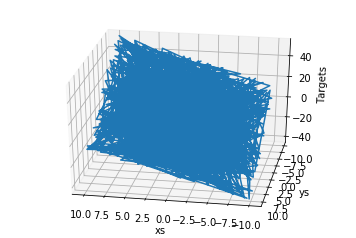

In [4]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('ys')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

## Re-examining the Linear model

In [9]:
# y = xw + b

init_range = 0.1 # our initial weights and biases will be picked randomly from [-.1,.1]
weights = np.random.uniform(-init_range,init_range,size=(2,1))
biases = np.random.uniform(-init_range,init_range,size=1)
print(weights)
print(biases)

[[ 0.05894473]
 [-0.02901088]]
[0.07459646]


## Set a learning rate

In [10]:
learning_rate = 0.02

## Train Model

In [13]:
for i in range(100):
    # 1000x1 = 1000x2 * 2x1   +  scalar
    outputs = np.dot(inputs,weights) + biases
    # 1000x1 = 1000x1 - 1000x1
    deltas = outputs - targets
    # average loss per observation
    loss = np.sum(deltas ** 2) / 2 / observations
    print(loss)
    
    deltas_scaled = deltas / observations
    # 2x1   =   2x1   -   scalar     +       2x1000   ,  1000x1
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

0.38762613815884756
0.37891117693459603
0.37054040472890487
0.36250022812724625
0.35477759057393926
0.34735995116942103
0.3402352643049053
0.3333919601013498
0.32681892562096476
0.32050548682076063
0.31444139121881753
0.30861679124513675
0.3030222282500325
0.2976486171440999
0.2924872316448084
0.2875296901057701
0.28276794190566795
0.27819425437473483
0.2738012002375668
0.26958164555186437
0.2655287381235232
0.26163589637925955
0.2578967986787026
0.2543053730485933
0.2508557873224201
0.24754243966948408
0.24435994949800602
0.24130314871750858
0.2383670733462812
0.2355469554503007
0.23283821540051625
0.23023645443592516
0.22773744752036384
0.2253371364814117
0.22303162342026725
0.22081716438189733
0.21869016327517435
0.2166471660331341
0.21468485500386786
0.21280004356294063
0.21098967093858764
0.20925079724128304
0.20758059868961293
0.20597636302469657
0.204435485105711
0.20295546267936754
0.20153389231646515
0.20016846550893053
0.19885696492099778
0.19759726078844586
0.196387307460045

## Print weights and biases to check our work

In [14]:
print(weights,biases)

[[ 2.00258136]
 [-2.998789  ]] [4.95019416]


## Plot last outputs vs targets

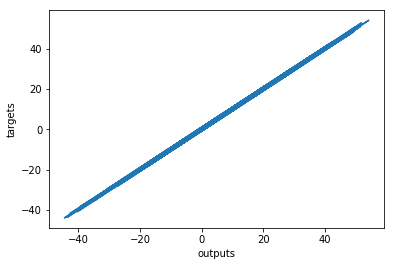

In [15]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()